In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [95]:
from sklearn.datasets import load_iris ## Classification dataset

In [96]:
iris=load_iris() 

In [97]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [98]:
print(iris['target']) #$ target variable

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [99]:
##independent features
X=pd.DataFrame(iris['data'],columns=['sepal length','sepal width','petal length','petal width'])

In [100]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [101]:
##dependent features
y=iris['target']

In [102]:
##train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [103]:
## apply Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier ## importing Decision Tree Classifier
treeclassifier=DecisionTreeClassifier() ## creating object of Decision Tree Classifier
## For Post-Pruning we can set max_depth = 2 key parameter while creating object like it is done in the lecture
## treeclassifier = DecisionTreeClassifier(max_depth=2)

In [104]:
treeclassifier.fit(X_train,y_train) ## fitting the model

DecisionTreeClassifier()

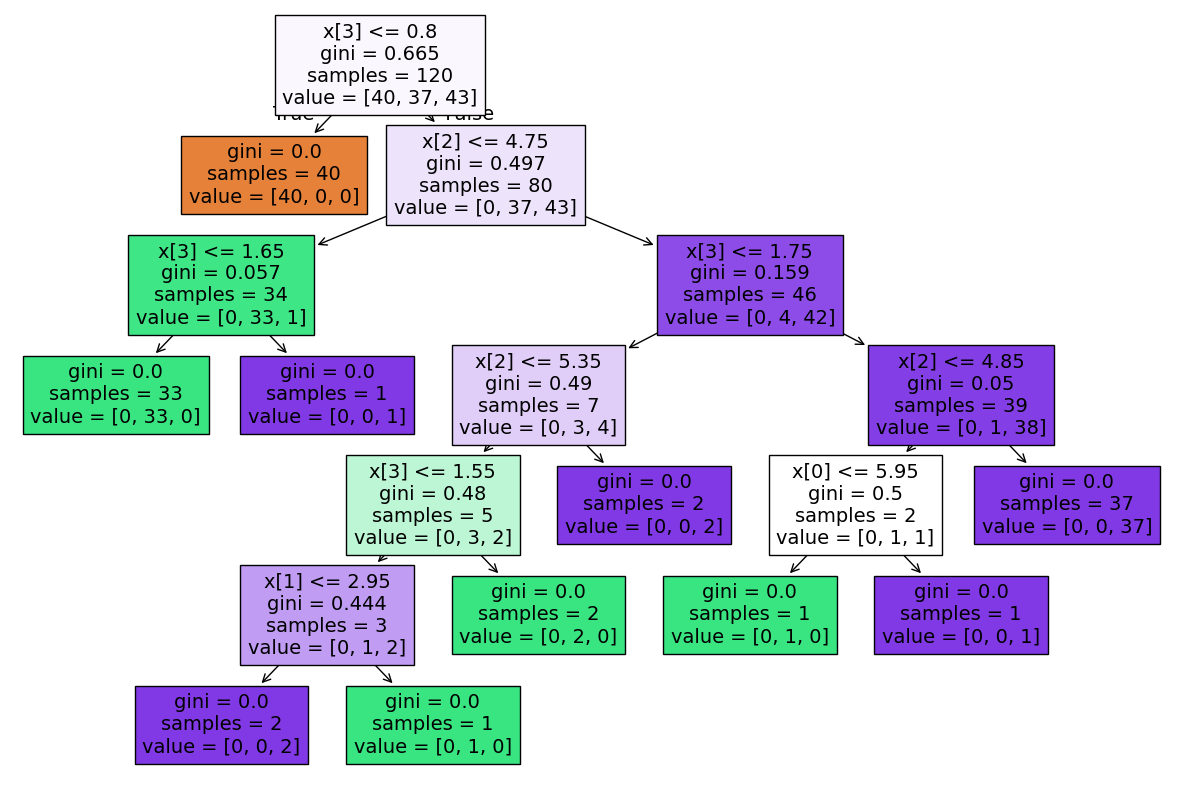

In [105]:
##Visualize the Decision Tree
from sklearn import tree 
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True) ## filled=True gives different colors to different classes
plt.show()

In [106]:
y_pred=treeclassifier.predict(X_test) ## predicting on test data

In [107]:
## Evaluation
from sklearn.metrics import confusion_matrix,classification_report

In [108]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



## Decision Tree Classifier Prepruning And Hyperparameter Tuning

In [ ]:
## Hyperparameter Tuning using GridSearchCV
## Define the parameter grid
param={
    'criterion':['gini','entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [110]:
param

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt', 'log2']}

In [ ]:
from sklearn.model_selection import GridSearchCV ## importing GridSearchCV

In [ ]:
treemodel=DecisionTreeClassifier() ## creating object of Decision Tree Classifier

In [ ]:
grid=GridSearchCV(treeclassifier,param_grid=param,cv=5,scoring='accuracy') ## creating object of GridSearchCV

In [ ]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train) ## fitting the model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
grid.best_params_ ## getting best parameters after hyperparameter tuning

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

In [ ]:
grid.best_score_ ## getting best score after hyperparameter tuning

np.float64(0.9666666666666668)

In [ ]:
y_pred=grid.predict(X_test) ## predicting on test data after hyperparameter tuning

In [118]:
y_pred

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2])

In [ ]:
## Evaluation after Hyperparameter Tuning
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



In [120]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [121]:
score

0.9333333333333333